# Summary

An Artificial Neural Network (ANN) was created to predict a bank’s member retention. This model was trained on the bank’s historical data which had features that included: member credit score, gender, location, length of membership, balance, and other features.

This ANN was created using Fast.ai/Pytorch and reached an accuracy of 85.8% on the validation set

# Data preprocessing

In [1]:
!pip install -Uqq fastbook
from fastai import *
from fastai.tabular.all import *
import pandas as pd
import numpy as np

In [2]:
#Import the dataset and conduct the initial preprocessing
dataset = pd.read_csv('Churn_Modeling.csv').iloc[:,3:]
dataset.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Building and training the ANN

In [3]:
#Specify the continuous and categorical data columns and set up the data
cat_names = ['Geography', 'Gender']
cont_names = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']
procs = [Categorify, FillMissing, Normalize]
to = TabularPandas(dataset, procs, cat_names, cont_names, y_names='Exited', y_block=CategoryBlock, 
                   splits=RandomSplitter(valid_pct=0.25, seed=1)(range_of(dataset)))
dls = to.dataloaders(bs=16)

In [4]:
#Create the learner
learn = tabular_learner(dls, layers=[3000], metrics=accuracy)

In [9]:
#Train the model
learn.fit_one_cycle(10)

epoch,train_loss,valid_loss,accuracy,time
0,0.369416,0.353148,0.854000,00:04
1,0.412209,0.369747,0.852800,00:04
2,0.385471,0.386387,0.840800,00:04
3,0.377138,0.361753,0.849200,00:04
4,0.375733,0.373729,0.846800,00:04
5,0.389861,0.352687,0.858400,00:04
6,0.373352,0.349646,0.855600,00:04
7,0.351974,0.341788,0.859600,00:04
8,0.333549,0.341859,0.857200,00:04
9,0.332910,0.343653,0.858400,00:04


# Evaluating the model

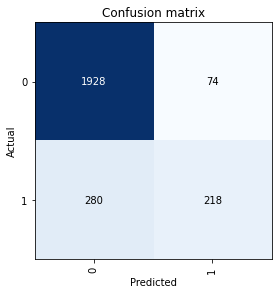

In [10]:
cm = ClassificationInterpretation.from_learner(learn)
cm.plot_confusion_matrix()

In [12]:
#Making a single prediction
#The model predicts that an active member (with a credit card) that is a 35 year old male from France with a credit score 
#of 500 that's been with the bank for 2 years and has a $2500 balance with an estimated $30,000 annual income will not leave
new_pred_dict = {'Geography':['France'],'Gender':['Male'], 'Age':[35], 'Tenure':[2], 'Balance':[2500], 'NumOfProducts':[1],	
                            'HasCrCard':[1],	'IsActiveMember':[1],	'EstimatedSalary':[30000], 'CreditScore':[500]}
new_preds = pd.DataFrame.from_dict(new_pred_dict)
learn.predict(new_preds.iloc[0])[1]

tensor(0)